In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PR_HS_LEN_performance = pd.read_csv('data/performance_PR_HS_LEN2.csv.gz')
#PR_HS_LEN_performance = PR_HS_LEN_performance[PR_HS_LEN_performance.tot_comments<200]
PR_HS_LEN_performance = PR_HS_LEN_performance.sort_values('tot_comments')
PR_HS_LEN_performance.shape

(383, 5)

In [3]:
RevRank_performance = pd.read_csv('data/performance_revRank.csv.gz')
#RevRank_performance = RevRank_performance[RevRank_performance.tot_product<200]
RevRank_performance = RevRank_performance.sort_values('tot_product')
RevRank_performance.shape

(383, 4)

## Log Chart

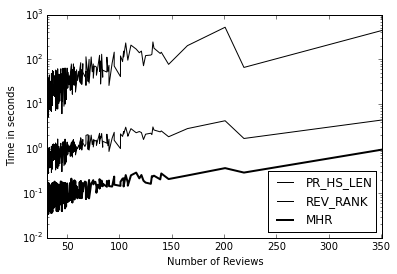

In [4]:
fig, ax = plt.subplots()
labels = []

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_phl', c="k")
labels.append("PR_HS_LEN")

ax = RevRank_performance.plot(ax=ax, kind='line', x='tot_product', y='time', c="k")
labels.append("REV_RANK")

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_mhr', c="k", linewidth=2)
labels.append("MHR")

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')
plt.show()

## Smooth Log Chart

In [5]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

In [6]:
PR_HS_LEN_performance['smooth_mhr'] = smooth(PR_HS_LEN_performance['elapsed_mhr'].values,25)
PR_HS_LEN_performance['smooth_phl'] = smooth(PR_HS_LEN_performance['elapsed_phl'].values,25)
PR_HS_LEN_performance['smooth_rev'] = smooth(RevRank_performance['time'].values,25)

In [56]:
#PR_HS_LEN_performance.smooth_rev

267    0.667691
51     0.639042
305    0.580180
293    0.550527
275    0.581745
272    0.605120
269    0.596000
163    0.593657
264    0.597354
92     0.587843
101    0.594386
102    0.672674
230    0.770713
227    0.776703
113    0.676045
115    0.559771
196    0.495646
190    0.519551
188    0.621689
146    0.655893
159    0.539807
161    0.486379
311    0.584917
326    0.644243
165    0.607939
346    0.577958
2      0.561348
14     0.523586
111    0.507108
183    0.520069
         ...   
242    1.347974
192    1.346295
376    1.625536
328    1.821891
361    1.627567
355    1.522068
287    1.769771
234    2.032388
179    2.217077
245    2.387543
220    2.448094
300    2.263733
77     2.212055
289    2.375236
286    2.401169
210    2.311781
291    2.131292
366    1.959152
325    2.008207
87     2.151510
348    2.360039
167    2.607973
330    2.610957
367    2.455960
213    2.321559
319    2.378292
356    2.829465
281    3.115350
336    3.144427
347    3.548487
Name: smooth_rev, dtype:

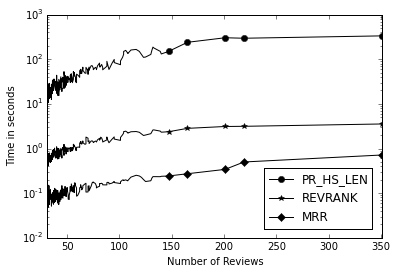

In [106]:
fig, ax = plt.subplots()
markers_on = [250, 300 ]
PR_HS_LEN_performance.plot(ax=ax, kind='line', marker='o', x='tot_comments', y='smooth_phl', c="k", markevery=(378,1),color='k',label="PR_HS_LEN")
PR_HS_LEN_performance.plot(ax=ax, kind='line', marker='*', x='tot_comments', y='smooth_rev', c="k",markevery=(378,1),color='k',label="REVRANK")
PR_HS_LEN_performance.plot(ax=ax, kind='line', marker='D', x='tot_comments', y='smooth_mhr', c="k",markevery=(378,1),color='k',label="MRR")

ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')

#first_legend = plt.legend(['PR_HS_LEN'], loc='upper right')
#ax = plt.gca().add_artist(first_legend)

# second_legend = plt.legend(['REVRANK'], loc='center right')
# ax = plt.gca().add_artist(second_legend)

# third_legend = plt.legend(['MRR'], loc='lower right')
# ax = plt.gca().add_artist(third_legend)

# plt.figtext(0.65, 0.76, '- PR_HS_LEN', color='black', weight='roman',
#              size='large', bbox={'facecolor':'white', })

# plt.figtext(0.65, 0.45, '- REVRANK', color='black', weight='roman',
#              size='large', bbox={'facecolor':'white', })

# plt.figtext(0.65, 0.33, '- MRR', color='black', weight='roman',
#              size='large', bbox={'facecolor':'white', })

plt.legend(numpoints=1,loc="upper left", bbox_to_anchor=(0.63,0.34))
plt.show()